# Exam problems for "Optimization methods" course, MSAI, Fall 2023

## Problem 1 (8 pts)

Check convexity of the following functions

1) (5 pts) $h = f^2 / g$, where $f: \mathbb{R}^n \to \mathbb{R}$ is nonnegative convex function, $g: \mathbb{R}^n \to \mathbb{R}$ is positive and concave function. Both $f$ and $g$ are twice continuously differentiable.

2) (2 pts) $f(\mathbf{x}) = \lambda_{\max}(\mathbf{A}_0 + \sum_{i=1}^n x_i \mathbf{A}_i)$, where $\mathbf{A}_i$ are symmetric square matrices.

3) (1 pts) $f(\mathbf{x}) = \|\mathbf{A}\mathbf{x} - \mathbf{b}\|_2^4$


### Your solution is here

### 2)

The matrix $\mathbf{A}_0 + \sum_{i=1}^n x_i \mathbf{A}_i$ is a linear combination of the matrices $\mathbf{A}_i$ with coefficients $x_i$. The operation of forming this linear combination is linear with respect to $\mathbf{x}$.

Since the operation that maps $\mathbf{x}$ to $\mathbf{A}_0 + \sum_{i=1}^n x_i \mathbf{A}_i$ is linear, and the mapping from this matrix to its largest eigenvalue is convex, the composition of these operations, $f(\mathbf{x})$, is convex. Convexity is preserved under composition with a linear mapping.

Therefore, it is a convex function.

### 3)

Given $f(\mathbf{x}) = \|\mathbf{A}\mathbf{x} - \mathbf{b}\|_2^4$, let's first express the norm squared, which is the square of the Euclidean norm:
$
\|\mathbf{A}\mathbf{x} - \mathbf{b}\|_2^2 = (\mathbf{A}\mathbf{x} - \mathbf{b})^T(\mathbf{A}\mathbf{x} - \mathbf{b})
$

Then, $f(\mathbf{x})$ can be seen as the square of this quantity:

$
f(\mathbf{x}) = \left((\mathbf{A}\mathbf{x} - \mathbf{b})^T(\mathbf{A}\mathbf{x} - \mathbf{b})\right)^2
$

To find the Hessian, we first compute the gradient ($\nabla f(\mathbf{x})$) and then differentiate again to find the Hessian ($H$).

The gradient of $f(\mathbf{x})$ with respect to $\mathbf{x}$ is:

$
\nabla f(\mathbf{x}) = 2\left((\mathbf{A}\mathbf{x} - \mathbf{b})^T(\mathbf{A}\mathbf{x} - \mathbf{b})\right) \cdot 2\mathbf{A}^T(\mathbf{A}\mathbf{x} - \mathbf{b})
$

$
\nabla f(\mathbf{x}) = 4\left((\mathbf{A}\mathbf{x} - \mathbf{b})^T(\mathbf{A}\mathbf{x} - \mathbf{b})\right) \mathbf{A}^T(\mathbf{A}\mathbf{x} - \mathbf{b})
$

Then, the Hessian $H$ of $f(\mathbf{x})$ is obtained by differentiating $\nabla f(\mathbf{x})$ with respect to $\mathbf{x}$ again:

$
H = \frac{\partial}{\partial \mathbf{x}} \left( 4\left((\mathbf{A}\mathbf{x} - \mathbf{b})^T(\mathbf{A}\mathbf{x} - \mathbf{b})\right) \mathbf{A}^T(\mathbf{A}\mathbf{x} - \mathbf{b}) \right)
$

The function $f(\mathbf{x}) = \|\mathbf{A}\mathbf{x} - \mathbf{b}\|_2^4$ is convex if its Hessian is positive semi-definite.

## Problem 2 (7 pts)

Solve analytically the following optimization problems

1) (2 pts) $\min_{x \in \mathbb{R}^n} \frac12 \|x - y \|_2^2 + \frac{\mu}{2} \sum_{i=2}^{n-1} (x_{i+1} - 2x_i + x_{i-1})^2$

2) (5 pts) $\min_x \|x\|_{\infty} + \frac{1}{2} \|x - y \|_2^2$

### Your solution is here

## Problem 3 (10 pts)

We consider a portfolio selection problem with $n$ assets and $N$ periods.
At the beginning of each period, we re-invest our total wealth, redistributing it over the $n$ assets using a fixed, constant, allocation strategy $x \in \mathbb{R}^n$, where $x \geq 0, \sum_{i=1}^n x_i = 1$.

In other words, if $W(t − 1)$ is our wealth at the beginning of period $t$, then during period $t$ we invest $x_i W(t−1)$ in asset $i$.
We denote by $\lambda(t)$ the total return during period $t$, i.e., $\lambda(t) = W(t)/W(t − 1)$.
At the end of the $N$ periods our wealth has been
multiplied by the factor $\prod_{i=1}^N \lambda(t)$.

We use a discrete stochastic model to account for the uncertainty in the returns. We assume that during each period there are $m$ possible scenarios, with probabilities $\pi_j, j = 1, \ldots, m$.
In scenario $j$, the return for asset $i$ over one period is given by $p_{ij}$ .
Therefore, the return $\lambda(t)$ of our portfolio during period $t$ is a random variable, with $m$ possible values $p_1^\top x, \ldots, p_m^\top x$ and distribution $\pi_j = \mathbb{P}(\lambda(t) = p_j^\top x)$.

The target for the investment strategy is to maximize the log long term relative wealth

$$ LogLTRW = \lim_{N \to \infty} \frac1N \log\left( \frac{W(N)}{W(0)} \right)$$

**Task 1** (2 pts)

Show that $LogLTRW = \sum_{j=1}^m
\pi_j \log(p_j^\top x)$ according to the considered discrete stochastic model.

**Task 2** (8 pts)

State the convex optimization problem that will provide strategy for maximization log long term relative wealth and solve it with cvxpy.
In the below code, matrix $P$ stores returns for $n=5$ assets and $m=10$ possible outcomes in each period. Also consider all outcomes equiprobable, so $\pi_j = 1/m$.

Compare the log long term relative wealth for the obtained optimal strategy woth the uniform strategy. Comment result.

In addition you can plot the possible trajectories sampled randomly from the optimal strategy ```x_opt``` and uniform strategy ```x_unif```.
This simulation assumes that $W(0) = 1$.

The objective is to maximize the expected log return, given by $\sum_{j=1}^m \frac{1}{m} \log(p_j^\top x)$.

Constraints:

- $x_i \geq 0$ for all $i=1,\ldots,n$: investment fractions must be non-negative.
- $\sum_{i=1}^n x_i = 1$: the total allocated wealth must sum to 1.

/Users/vsaraikin/miniconda3/envs/ml/lib/python3.10/site-packages/cvxpy/expressions/expression.py:621: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 11 times so far.

  warnings.warn(msg, UserWarning)
/Users/vsaraikin/miniconda3/envs/ml/lib/python3.10/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


Text(0, 0.5, 'wealth')

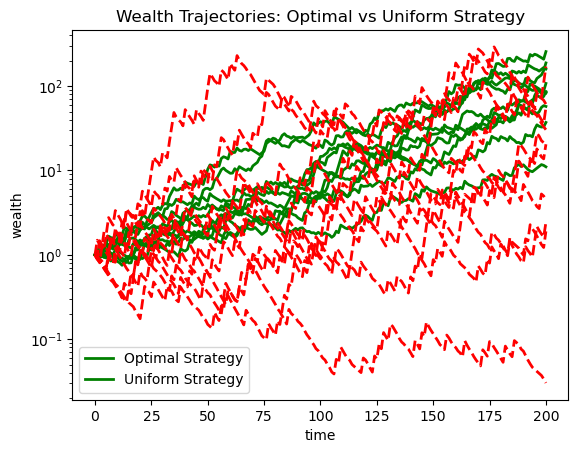

In [27]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

P = np.array(np.mat(
    '3.5000    1.1100    1.1100    1.0400    1.0100;\
     0.5000    0.9700    0.9800    1.0500    1.0100;\
     0.5000    0.9900    0.9900    0.9900    1.0100;\
     0.5000    1.0500    1.0600    0.9900    1.0100;\
     0.5000    1.1600    0.9900    1.0700    1.0100;\
     0.5000    0.9900    0.9900    1.0600    1.0100;\
     0.5000    0.9200    1.0800    0.9900    1.0100;\
     0.5000    1.1300    1.1000    0.9900    1.0100;\
     0.5000    0.9300    0.9500    1.0400    1.0100;\
     3.5000    0.9900    0.9700    0.9800    1.0100'))

m = P.shape[0]
n = P.shape[1]
x_unif = np.ones(n)/n; # uniform resource allocation

#################################################################
pi = np.ones(m) / m

x_opt = cp.Variable(n)

objective = cp.Maximize(cp.sum(pi * cp.log(P @ x_opt)))

constraints = [x_opt >= 0, cp.sum(x_opt) == 1]

problem = cp.Problem(objective, constraints)
problem.solve()

#################################################################

np.random.seed(10)
N = 10;  # number of random trajectories
T = 200; # time horizon
w_opt = np.zeros((N,T+1))
w_unif = np.zeros((N,T+1))
for i in range(N):
	events = np.floor(np.random.rand(T)*m)
	events = events.astype(int)
	P_event = P[events,:]
	w_opt[i,:] = np.append(1, np.cumprod(P_event @ x_opt.value))
	w_unif[i,:] = np.append(1, np.cumprod(P_event @ x_unif))


plt.gca().set_yscale('log')
plt.plot(range(T+1), np.transpose(w_opt), color="green", linewidth=2.0)
plt.plot(np.arange(T+1), np.transpose(w_unif), color="red", linewidth=2.0, linestyle='--')
plt.title("Optimal vs Uniform Strategy")
plt.legend(['Optimal Strategy (green)', 'Uniform Strategy (red)'])
plt.xlabel('time')
plt.ylabel('wealth')

The plots show that portfolios following the optimal strategy grow to higher values more consistently than those using the uniform strategy, illustrating the potential for optimized portfolios to achieve superior returns.

Also the ROI for the optimizated strategy is higher than for the uniform one.

In [28]:
LogLTRW_opt, LogLTRW_unif

(0.023078320930631994, 0.011370774818392035)